# ActBlue basic details

In [1]:
import json
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import os
import requests

/Users/chriszs/.local/share/virtualenvs/actblue-analysis-AfcA3U3w/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
%matplotlib inline

plt.style.use('ggplot')

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
def read_or_save(name, func):
    path = 'pickles/' + name + '.pickle.gz'
    if (os.path.isfile(path)):
        return pd.read_pickle(path)
    else:
        result = func()
        os.makedirs('pickles', exist_ok=True)
        result.to_pickle(path)
        return result

In [4]:
committee_id = "C00401224"
year_since = 2012

### Connect to the PostgreSQL database

In [5]:
with open("config.json") as f:
    conf = json.load(f)
conn = psycopg2.connect(
    dbname=conf['dbname'],
    user=conf['user'],
    host=conf['host'],
    password=conf['password']
)

### How many reports are in the database?

In [6]:
read_or_save(
    'filings_count',
    lambda: pd.read_sql("""
    SELECT count(*)
    FROM fec_filings;
    """, con=conn)
)

,count
0,355934


### Which ActBlue reports do we have?

In [7]:
actblue_summaries = read_or_save(
    'actblue_summaries',
    lambda: pd.read_sql("""
    SELECT *
    FROM fec_pac_summaries
    JOIN fec_amended_filings USING (filing_id)
    WHERE filer_committee_id_number = '""" + committee_id + """'
    AND extract(year from coverage_through_date) > """ + str(year_since) + """
    ORDER BY coverage_through_date DESC;
    """, con=conn, parse_dates={
        'coverage_from_date': '%Y-%m-%d',
        'coverage_through_date': '%Y-%m-%d'
    })
)

actblue_summaries[[
    'filing_id',
    'form_type',
    'committee_name',
    'coverage_from_date',
    'coverage_through_date',
    'report_code',
    'col_a_total_contributions'
]]

,filing_id,form_type,committee_name,coverage_from_date,coverage_through_date,report_code,col_a_total_contributions
0,1251343,F3XN,ActBlue,2018-06-01,2018-06-30,M7,"63,088,119.19"
1,1240253,F3XN,ActBlue,2018-05-01,2018-05-31,M6,"43,130,233.11"
2,1233520,F3XN,ActBlue,2018-04-01,2018-04-30,M5,"38,328,646.45"
3,1225971,F3XN,ActBlue,2018-03-01,2018-03-31,M4,"57,825,086.02"
4,1215697,F3XN,ActBlue,2018-02-01,2018-02-28,M3,"41,932,847.30"
5,1224404,F3XA,ActBlue,2018-01-01,2018-01-31,M2,"32,937,704.67"
6,1224416,F3XA,ActBlue,2017-12-01,2017-12-31,YE,"51,181,861.72"
7,1219434,F3XA,ActBlue,2017-11-01,2017-11-30,M12,"36,180,318.82"
8,1219420,F3XA,ActBlue,2017-10-01,2017-10-31,M11,"29,341,844.16"
9,1218757,F3XA,ActBlue,2017-09-01,2017-09-30,M10,"34,193,318.59"


### Are there any reports that FEC.gov has that we don't or vice versa?

In [8]:
def get_reports(committee_id):
    base = "https://api.open.fec.gov/v1/"
    url = base + "committee/" + committee_id + "/reports/?api_key=" + conf['fec_key'] + "&is_amended=False&per_page=100"

    return pd.DataFrame(requests.get(url).json()['results'])

actblue_api_summaries = read_or_save('actblue_api_summaries', lambda: get_reports(committee_id))
pd.to_numeric(actblue_api_summaries['calendar_ytd'])
actblue_api_summaries = actblue_api_summaries[actblue_api_summaries['calendar_ytd'] > year_since]
actblue_api_summaries[['file_number','calendar_ytd']]

pd.DataFrame(pd.concat([actblue_api_summaries['file_number'],
                        actblue_summaries['filing_id']]).drop_duplicates(keep=False))

,0


### How have contributions changed over time?

Text(0.5,1,'Total contributions by reporting period')

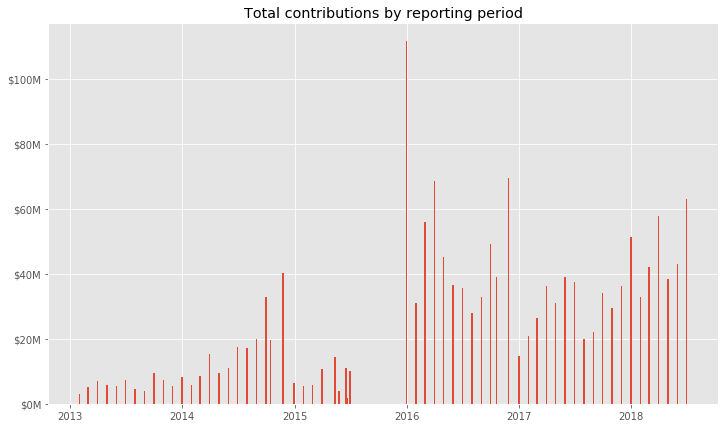

In [9]:
contribs_over_time = actblue_summaries[['coverage_through_date','col_a_total_contributions']]

# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html
contribs_over_time.set_index('coverage_through_date',inplace=True)

fig, ax = plt.subplots(figsize=(12,7))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: '$%1.fM' % (x*1e-6)))

ax.bar(contribs_over_time.index, contribs_over_time['col_a_total_contributions'], width=5)

ax.set_title('Total contributions by reporting period')

In [10]:
contribs_by_year = pd.DataFrame(
    actblue_summaries.groupby(actblue_summaries.coverage_through_date.dt.year)['col_a_total_contributions'].sum()
)
contribs_by_year

,col_a_total_contributions
coverage_through_date,
2013,"72,982,794.21"
2014,"203,718,311.99"
2015,"174,548,526.96"
2016,"505,359,517.22"
2017,"383,829,198.73"
2018,"277,242,636.74"


Text(0.5,1,'Total contributions by year')

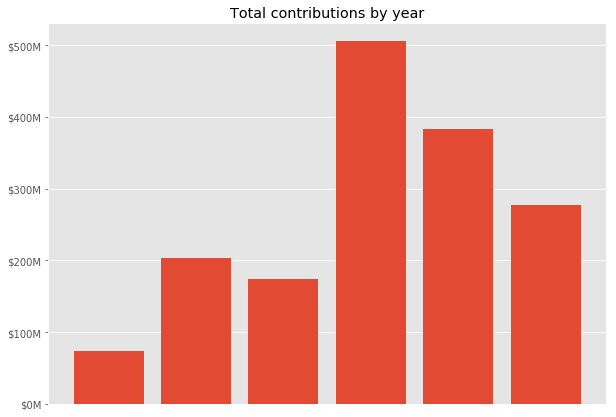

In [11]:
# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html
# contribs_by_year.set_index('coverage_through_date',inplace=True)

fig, ax = plt.subplots(figsize=(10,7))

ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: '$%1.fM' % (x*1e-6)))

ax.bar(contribs_by_year.index, contribs_by_year['col_a_total_contributions'], width=0.8)

ax.set_title('Total contributions by year')

### How many Democratic campaigns use ActBlue?

In [12]:
actblue_transfers = read_or_save(
    'actblue_transfers',
    lambda: pd.read_sql("""
    SELECT fec_committees.name,
           totals.*
    FROM
      (SELECT beneficiary_committee_fec_id,
              count(*),
              sum(expenditure_amount)
       FROM fec_expenditures
       WHERE filing_id IN
           (SELECT filing_id
            FROM fec_pac_summaries
            JOIN fec_amended_filings USING (filing_id)
            WHERE filer_committee_id_number = '""" + committee_id + """'
              AND extract(YEAR
                          FROM coverage_through_date) > """ + str(year_since) + """
            ORDER BY coverage_through_date DESC)
         AND form_type = 'SB23'
       GROUP BY beneficiary_committee_fec_id) AS totals
    JOIN fec_committees ON beneficiary_committee_fec_id = fec_committees.id
    """, con=conn)
)
actblue_transfers.sort_values(by=['sum'], ascending=False)

,name,beneficiary_committee_fec_id,count,sum
3136,DCCC,C00000935,10523634,"216,798,554.31"
2901,BERNIE 2016,C00577130,6955993,"180,898,812.29"
1361,DSCC,C00042366,3178423,"88,680,126.29"
1247,END CITIZENS UNITED,C00573261,3222408,"43,350,558.88"
976,JON OSSOFF FOR CONGRESS,C00630426,1430332,"27,468,759.69"
645,DOUG JONES FOR SENATE COMMITTEE,C00640623,751396,"21,794,791.07"
1645,PROGRESSIVE TURNOUT PROJECT,C00580068,1259699,"17,063,501.99"
254,BETO FOR TEXAS,C00501197,438205,"14,569,429.26"
376,GILLIBRAND FOR SENATE,C00413914,368239,"13,756,012.27"
2336,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,C00010603,595137,"12,655,810.48"


In [13]:
actblue_proportion = read_or_save(
    'actblue_proportion',
    lambda: pd.read_sql("""
    SELECT actblue,
           count(*)
    FROM
      (SELECT cand_id,
              cand_pcc,
              CASE
                  WHEN COUNT IS NOT NULL THEN TRUE
                  ELSE FALSE
              END AS actblue
       FROM (SELECT DISTINCT ON (cand_id,
                               cand_pcc) *
           FROM fec_candidates
           WHERE cand_election_yr = '2018'
             AND cand_pcc IS NOT NULL
             AND cand_pty_affiliation IN ('DFL',
                                      'DEM')
           ORDER BY cand_id,
                    cand_pcc) AS cands
       LEFT JOIN
         (SELECT fec_committees.name,
                 totals.*
          FROM
            (SELECT beneficiary_committee_fec_id,
                    count(*) AS COUNT,
                    sum(expenditure_amount)
             FROM fec_expenditures
             WHERE filing_id IN
                 (SELECT filing_id
                  FROM fec_pac_summaries
                  JOIN fec_amended_filings USING (filing_id)
                  WHERE filer_committee_id_number = '""" + committee_id + """'
                    AND extract(YEAR
                                FROM coverage_through_date) >= 2017
                  ORDER BY coverage_through_date DESC)
               AND form_type = 'SB23'
             GROUP BY beneficiary_committee_fec_id) AS totals
          JOIN fec_committees ON beneficiary_committee_fec_id = fec_committees.id) AS actblue_committees ON cand_pcc = beneficiary_committee_fec_id) AS actblue_candidates
    GROUP BY actblue
    """, con=conn)
)

actblue_proportion

,actblue,count
0,False,227
1,True,1342


In [14]:
actblue_proportion_amount = read_or_save(
    'actblue_proportion_amount',
    lambda: pd.read_sql("""
    SELECT cand_pcc,
           array_agg(coverage_from_date) AS from_dates,
           array_agg(coverage_through_date) AS through_dates,
           sum(col_a_total_individual_contributions) AS committee_total,
           sum(actblue_total) AS actblue_total
    FROM
      (SELECT cand_pcc,
              coverage_from_date,
              coverage_through_date,
              col_a_total_individual_contributions,
              sum(expenditure_amount) AS actblue_total
       FROM
         (SELECT cand_id,
                 cand_pcc,
                 coverage_from_date,
                 coverage_through_date,
                 col_a_total_individual_contributions
          FROM
            (SELECT DISTINCT ON (cand_id,
                                 cand_pcc) *
             FROM fec_candidates
             WHERE cand_election_yr = '2018'
               AND cand_pty_affiliation IN ('DFL',
                                            'DEM')
               AND cand_pcc IS NOT NULL
             ORDER BY cand_id,
                      cand_pcc) AS cands
          JOIN fec_campaign_summaries ON cand_pcc = filer_committee_id_number
          JOIN fec_amended_filings USING (filing_id)
          WHERE extract(YEAR
                        FROM coverage_through_date) >= 2017
            AND coverage_through_date <= '2018-06-30'::date
          UNION SELECT cand_id,
                       cand_pcc,
                       coverage_from_date,
                       coverage_through_date,
                       col_a_total_individual_contributions
          FROM
            (SELECT DISTINCT ON (cand_id,
                                 cand_pcc) *
             FROM fec_candidates
             WHERE cand_election_yr = '2018'
               AND cand_pty_affiliation IN ('DFL',
                                            'DEM')
               AND cand_pcc IS NOT NULL
             ORDER BY cand_id,
                      cand_pcc) AS cands
          JOIN
            ( SELECT DISTINCT ON (filer_committee_id_number,
                                  coverage_from_date,
                                  coverage_through_date) filing_id,
                                 filer_committee_id_number,
                                 col_a_total_individual_contributions,
                                 coverage_from_date,
                                 coverage_through_date
             FROM fec_paper_campaign_summaries
             WHERE col_a_total_individual_contributions IS NOT NULL
             ORDER BY filer_committee_id_number,
                      coverage_through_date,
                      coverage_from_date,
                      filing_id DESC ) AS paper_totals ON cand_pcc = filer_committee_id_number
          WHERE extract(YEAR
                        FROM coverage_through_date) >= 2017
            AND coverage_through_date <= '2018-06-30'::date) AS candidate_totals
       LEFT JOIN fec_expenditures ON filing_id IN
         (SELECT filing_id
          FROM fec_pac_summaries
          JOIN fec_amended_filings USING (filing_id)
          WHERE filer_committee_id_number = 'C00401224'
            AND extract(YEAR
                        FROM coverage_through_date) >= 2017
            AND coverage_through_date <= '2018-06-30'::date
          ORDER BY coverage_through_date DESC)
       AND form_type = 'SB23'
       AND beneficiary_committee_fec_id = cand_pcc
       AND coverage_from_date <= expenditure_date
       AND coverage_through_date >= expenditure_date
       GROUP BY cand_pcc,
                col_a_total_individual_contributions,
                coverage_from_date,
                coverage_through_date) AS totals
    GROUP BY cand_pcc
    """, con=conn)
)

actblue_proportion_amount

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00140715,"[2017-04-01, 2018-04-01, 2017-07-01, 2017-10-0...","[2017-06-30, 2018-06-06, 2017-09-30, 2017-12-3...","833,046.34","5,066.66"
1,C00154625,"[2018-01-01, 2017-01-01, 2018-04-01, 2017-04-0...","[2018-03-31, 2017-03-31, 2018-04-18, 2017-06-3...","130,641.98","15,336.74"
2,C00156612,"[2017-07-01, 2017-10-01, 2018-01-01, 2018-04-0...","[2017-09-30, 2017-12-31, 2018-03-31, 2018-06-3...","14,537.54","5,412.54"
3,C00166504,"[2017-07-01, 2017-01-01, 2017-10-01, 2018-01-0...","[2017-09-30, 2017-03-31, 2017-12-31, 2018-03-3...","307,848.35","17,901.00"
4,C00167585,"[2017-01-01, 2017-07-01, 2018-01-01, 2017-04-0...","[2017-03-31, 2017-09-30, 2018-03-31, 2017-06-3...","438,618.26","188,207.51"
5,C00172619,"[2017-01-01, 2017-07-01, 2018-01-01, 2017-04-0...","[2017-03-31, 2017-09-30, 2018-02-28, 2017-06-3...","31,768.35","6,133.97"
6,C00195628,"[2017-10-01, 2018-04-01, 2017-01-01, 2018-04-1...","[2017-12-31, 2018-04-18, 2017-03-31, 2018-06-3...","273,330.00",446.80
7,C00202416,"[2018-05-03, 2017-10-01, 2017-04-01, 2018-04-0...","[2018-06-30, 2017-12-31, 2017-06-30, 2018-05-0...","2,255,642.66","1,552,231.91"
8,C00213512,"[2018-01-01, 2018-05-17, 2018-04-01, 2017-07-0...","[2018-03-31, 2018-06-30, 2018-05-16, 2017-09-3...","2,176,410.60","2,131,978.08"
9,C00213611,"[2018-01-01, 2017-01-01, 2017-07-01, 2017-04-0...","[2018-03-31, 2017-03-31, 2017-09-30, 2017-06-3...","271,648.26","133,061.26"


In [15]:
actblue_proportion_amount['actblue_total'].sum()/actblue_proportion_amount['committee_total'].sum()

0.5283238780133255

In [16]:
actblue_proportion_amount['actblue_total'].sum()

336000884.93

In [17]:
actblue_proportion_amount.to_csv('data/actblue_proportion.csv')

In [18]:
actblue_proportion_amount_14 = read_or_save(
    'actblue_proportion_amount_14',
    lambda: pd.read_sql("""
    SELECT cand_pcc,
           array_agg(coverage_from_date) AS from_dates,
           array_agg(coverage_through_date) AS through_dates,
           sum(col_a_total_individual_contributions) AS committee_total,
           sum(actblue_total) AS actblue_total
    FROM
      (SELECT cand_pcc,
              coverage_from_date,
              coverage_through_date,
              col_a_total_individual_contributions,
              sum(expenditure_amount) AS actblue_total
       FROM
         (SELECT cand_id,
                 cand_pcc,
                 coverage_from_date,
                 coverage_through_date,
                 col_a_total_individual_contributions
          FROM
            (SELECT DISTINCT ON (cand_id,
                                 cand_pcc) *
             FROM fec_candidates
             WHERE cand_election_yr = '2014'
               AND cand_pty_affiliation IN ('DFL',
                                            'DEM')
               AND cand_pcc IS NOT NULL
             ORDER BY cand_id,
                      cand_pcc) AS cands
          JOIN fec_campaign_summaries ON cand_pcc = filer_committee_id_number
          JOIN fec_amended_filings USING (filing_id)
          WHERE extract(YEAR
                        FROM coverage_through_date) >= 2013
            AND coverage_through_date <= '2014-06-30'::date
          UNION SELECT cand_id,
                       cand_pcc,
                       coverage_from_date,
                       coverage_through_date,
                       col_a_total_individual_contributions
          FROM
            (SELECT DISTINCT ON (cand_id,
                                 cand_pcc) *
             FROM fec_candidates
             WHERE cand_election_yr = '2014'
               AND cand_pty_affiliation IN ('DFL',
                                            'DEM')
               AND cand_pcc IS NOT NULL
             ORDER BY cand_id,
                      cand_pcc) AS cands
          JOIN
            ( SELECT DISTINCT ON (filer_committee_id_number,
                                  coverage_from_date,
                                  coverage_through_date) filing_id,
                                 filer_committee_id_number,
                                 col_a_total_individual_contributions,
                                 coverage_from_date,
                                 coverage_through_date
             FROM fec_paper_campaign_summaries
             WHERE col_a_total_individual_contributions IS NOT NULL
             ORDER BY filer_committee_id_number,
                      coverage_through_date,
                      coverage_from_date,
                      filing_id DESC ) AS paper_totals ON cand_pcc = filer_committee_id_number
          WHERE extract(YEAR
                        FROM coverage_through_date) >= 2013
            AND coverage_through_date <= '2014-06-30'::date) AS candidate_totals
       LEFT JOIN fec_expenditures ON filing_id IN
         (SELECT filing_id
          FROM fec_pac_summaries
          JOIN fec_amended_filings USING (filing_id)
          WHERE filer_committee_id_number = 'C00401224'
            AND extract(YEAR
                        FROM coverage_through_date) >= 2013
            AND coverage_through_date <= '2014-06-30'::date
          ORDER BY coverage_through_date DESC)
       AND form_type = 'SB23'
       AND beneficiary_committee_fec_id = cand_pcc
       AND coverage_from_date <= expenditure_date
       AND coverage_through_date >= expenditure_date
       GROUP BY cand_pcc,
                col_a_total_individual_contributions,
                coverage_from_date,
                coverage_through_date) AS totals
    GROUP BY cand_pcc
    """, con=conn)
)

actblue_proportion_amount_14['actblue_total'].sum()/actblue_proportion_amount_14['committee_total'].sum()

0.15741528605599156

In [19]:
actblue_proportion_amount_14

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00002600,"[2013-04-01, 2013-01-01, 2014-01-01, 2013-07-0...","[2013-06-30, 2013-03-31, 2014-03-31, 2013-09-3...","58,335.00","1,310.00"
1,C00013128,"[2013-07-01, 2014-01-01, 2013-01-01, 2013-10-0...","[2013-09-30, 2014-03-31, 2013-03-31, 2013-12-3...","466,245.00","10,809.00"
2,C00026757,"[2013-01-01, 2014-04-01, 2014-01-01, 2013-04-0...","[2013-03-31, 2014-06-30, 2014-03-31, 2013-06-3...","191,410.02","2,402.76"
3,C00081356,"[2013-01-01, 2014-04-24, 2013-07-01, 2014-04-0...","[2013-03-31, 2014-06-30, 2013-09-30, 2014-04-2...","581,162.61","21,345.61"
4,C00088484,[2013-01-01],[2013-03-31],500.00,nan
5,C00140715,"[2014-01-01, 2013-01-01, 2013-10-01, 2013-07-0...","[2014-03-31, 2013-03-31, 2013-12-31, 2013-09-3...","969,131.00","1,010.00"
6,C00148999,"[2013-07-01, 2014-02-27, 2014-04-01, 2013-04-0...","[2013-09-30, 2014-03-31, 2014-06-30, 2013-06-3...","4,047,069.78","875,243.41"
7,C00154625,"[2013-04-01, 2013-07-01, 2014-01-01, 2013-01-0...","[2013-06-30, 2013-09-30, 2014-03-31, 2013-03-3...","134,320.46","17,201.06"
8,C00156612,"[2013-01-01, 2013-04-01, 2014-01-01, 2013-10-0...","[2013-03-31, 2013-06-30, 2014-03-31, 2013-12-3...","229,637.36",500.00
9,C00165241,"[2014-04-01, 2013-10-01, 2013-07-01, 2014-01-0...","[2014-06-30, 2013-12-31, 2013-09-30, 2014-03-3...",0.00,nan


In [20]:
actblue_proportion_amount_14['actblue_total'].sum()

47704559.809999995

### Are Republican groups reporting any small donor data that we could analyze in a valid way, or is that just impossible?

In [21]:
transfer_committees = read_or_save(
    'transfer_committees',
    lambda: pd.read_sql("""
    SELECT filer_committee_id_number,
           fec_committees.name,
           count,
           sum
    FROM
        (SELECT filer_committee_id_number,
               count(*) AS count,
               sum(expenditure_amount) as sum
        FROM fec_expenditures
        JOIN fec_amended_filings using (filing_id)
        WHERE 
        -- filer_committee_id_number != '""" + committee_id + """' AND 
         extract(YEAR
                      FROM expenditure _date) >= 2017
          AND beneficiary_committee_fec_id IS NOT NULL
          AND form_type = 'SB23'
        GROUP BY filer_committee_id_number
        ORDER BY COUNT DESC
        LIMIT 10) as counts
    LEFT JOIN fec_committees
    ON fec_committees.id = filer_committee_id_number
    """, con=conn)
)

transfer_committees

,filer_committee_id_number,name,count,sum
0,C00401224,ACTBLUE,22982059,"633,999,446.98"
1,C00632133,SWING LEFT,1151153,"3,000,665.42"
2,C00341396,MOVEON.ORG POLITICAL ACTION,54605,"1,918,649.46"
3,C00252940,LEAGUE OF CONSERVATION VOTERS ACTION FUND,15173,"2,499,082.23"
4,C00432260,CLUB FOR GROWTH PAC,11325,"3,322,713.54"
5,C00608489,GREAT AMERICA PAC,11007,"129,904.46"
6,C00441949,JSTREETPAC,6065,"2,665,673.98"
7,C00484535,VOTESANE PAC,5320,"2,996,614.16"
8,C00552851,HOUSE FREEDOM FUND,3447,"3,307,444.00"
9,C00450098,WOMENCOUNT PAC,3099,"650,278.30"


### Unitemized contributions versus itemized for this point in the cycle for both the 2018 and 2014 cycle, and break it down by Republican versus Democrat?

In [22]:
candidate_unitemized_by_party_14 = read_or_save(
    'candidate_unitemized_by_party_14',
    lambda: pd.read_sql("""
        SELECT CASE
                   WHEN cand_pty_affiliation = 'DEM' THEN 'Democrat'
                   WHEN cand_pty_affiliation = 'DFL' THEN 'Democrat'
                   WHEN cand_pty_affiliation = 'REP' THEN 'Republican'
                   ELSE 'other'
               END AS party, -- cand_office,
         count(DISTINCT cand_id),
         sum(col_a_individual_contributions_itemized) AS itemized,
         sum(col_a_individual_contributions_unitemized) AS unitemized,
         sum(col_a_total_individual_contributions) AS indivs
        FROM
          (SELECT DISTINCT ON (cand_id,
                               cand_pcc) *
           FROM fec_candidates
           WHERE cand_election_yr = '2014'
             AND cand_pcc IS NOT NULL
           ORDER BY cand_id,
                    cand_pcc) AS cands
        JOIN
          (SELECT filing_id,
                  filer_committee_id_number,
                  col_a_individual_contributions_itemized,
                  col_a_individual_contributions_unitemized,
                  col_a_total_individual_contributions,
                  col_a_total_receipts,
                  col_a_total_disbursements,
                  coverage_from_date,
                  coverage_through_date
           FROM fec_campaign_summaries
           JOIN fec_amended_filings USING (filing_id)
           UNION SELECT DISTINCT ON (filer_committee_id_number,
                                     coverage_from_date,
                                     coverage_through_date) filing_id,
                                    filer_committee_id_number,
                                    col_a_individual_contributions_itemized,
                                    col_a_individual_contributions_unitemized,
                                    col_a_total_individual_contributions,
                                    col_a_total_receipts,
                                    col_a_total_disbursements,
                                    coverage_from_date,
                                    coverage_through_date
           FROM fec_paper_campaign_summaries
           WHERE col_a_total_individual_contributions IS NOT NULL
           ORDER BY filer_committee_id_number,
                    coverage_through_date,
                    coverage_from_date,
                    filing_id DESC) AS summaries ON cand_pcc = filer_committee_id_number
        WHERE extract(YEAR
                      FROM coverage_through_date) >= 2013
          AND coverage_through_date <= '2014-06-30'::date -- AND (col_a_total_receipts > 0
        --       OR col_a_total_disbursements > 0)
        GROUP BY -- cand_office,
         party
        ORDER BY indivs DESC
    """, con=conn)
)
candidate_unitemized_by_party_14

,party,count,itemized,unitemized,indivs
0,Republican,810,"288,486,859.60","48,569,339.29","337,076,558.79"
1,Democrat,606,"262,055,991.76","59,435,896.06","321,491,022.82"
2,other,82,"2,094,458.54","644,144.99","2,740,799.53"


In [23]:
candidate_unitemized_by_party_18 = read_or_save(
    'candidate_unitemized_by_party_18',
    lambda: pd.read_sql("""
        SELECT CASE
                   WHEN cand_pty_affiliation = 'DEM' THEN 'Democrat'
                   WHEN cand_pty_affiliation = 'DFL' THEN 'Democrat'
                   WHEN cand_pty_affiliation = 'REP' THEN 'Republican'
                   ELSE 'other'
               END AS party, -- cand_office,
         count(DISTINCT cand_id),
         sum(col_a_individual_contributions_itemized) AS itemized,
         sum(col_a_individual_contributions_unitemized) AS unitemized,
         sum(col_a_total_individual_contributions) AS indivs
        FROM
          (SELECT DISTINCT ON (cand_id,
                               cand_pcc) *
           FROM fec_candidates
           WHERE cand_election_yr = '2018'
             AND cand_pcc IS NOT NULL
           ORDER BY cand_id,
                    cand_pcc) AS cands
        JOIN
          (SELECT filing_id,
                  filer_committee_id_number,
                  col_a_individual_contributions_itemized,
                  col_a_individual_contributions_unitemized,
                  col_a_total_individual_contributions,
                  col_a_total_receipts,
                  col_a_total_disbursements,
                  coverage_from_date,
                  coverage_through_date
           FROM fec_campaign_summaries
           JOIN fec_amended_filings USING (filing_id)
           UNION SELECT DISTINCT ON (filer_committee_id_number,
                                     coverage_from_date,
                                     coverage_through_date) filing_id,
                                    filer_committee_id_number,
                                    col_a_individual_contributions_itemized,
                                    col_a_individual_contributions_unitemized,
                                    col_a_total_individual_contributions,
                                    col_a_total_receipts,
                                    col_a_total_disbursements,
                                    coverage_from_date,
                                    coverage_through_date
           FROM fec_paper_campaign_summaries
           WHERE col_a_total_individual_contributions IS NOT NULL
           ORDER BY filer_committee_id_number,
                    coverage_through_date,
                    coverage_from_date,
                    filing_id DESC) AS summaries ON cand_pcc = filer_committee_id_number
        WHERE extract(YEAR
                      FROM coverage_through_date) >= 2017
          AND coverage_through_date <= '2018-06-30'::date -- AND (col_a_total_receipts > 0
        --       OR col_a_total_disbursements > 0)
        GROUP BY -- cand_office,
         party
        ORDER BY indivs DESC
    """, con=conn)
)
candidate_unitemized_by_party_18


,party,count,itemized,unitemized,indivs
0,Democrat,1287,"492,648,413.34","179,975,253.11","674,488,824.60"
1,Republican,929,"301,799,862.65","59,636,218.46","361,191,912.11"
2,other,138,"7,485,592.75","7,097,698.75","14,635,150.50"


### How candidates in the DCCC’s Red to Blue program do via ActBlue.

In [24]:
redtoblue = ['C00572859',
            'C00575209',
            'C00578476',
            'C00633982',
            'C00637074',
            'C00637363',
            'C00637371',
            'C00637868',
            'C00640003',
            'C00640045',
            'C00640714',
            'C00641381',
            'C00646745',
            'C00646752',
            'C00647537',
            'C00648220',
            'C00648493',
            'C00648725',
            'C00648956',
            'C00649327',
            'C00649483',
            'C00649558',
            'C00649798',
            'C00650150',
            'C00650648',
            'C00651042',
            'C00652065',
            'C00652248',
            'C00652297',
            'C00652594',
            'C00652719',
            'C00653121',
            'C00654400',
            'C00656686',
            'C00658633',
            'C00661868',
            'C00662577',
            'C00664375',
            'C00666149',
            'C00667519',
            'C00668228',
            'C00671156',
            'C00675538',
            'C00639146',
            'C00634212',
            'C00636571',
            'C00634253',
            'C00646844',
            'C00653816',
            'C00667097',
            'C00658567',
            'C00649913',
            'C00638023',
            'C00647164',
            'C00639989']

redtoblue_actblue = actblue_proportion_amount[actblue_proportion_amount['cand_pcc'].isin(redtoblue)]

redtoblue_actblue

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
221,C00572859,"[2017-01-01, 2017-07-01, 2018-04-01, 2017-10-0...","[2017-03-31, 2017-09-30, 2018-06-30, 2017-12-3...","1,026,390.47","675,571.51"
227,C00575209,"[2017-07-01, 2018-04-01, 2018-01-01, 2017-04-0...","[2017-09-30, 2018-06-30, 2018-03-31, 2017-06-3...","1,425,243.95","774,510.06"
335,C00633982,"[2018-01-01, 2018-05-17, 2017-07-01, 2017-02-2...","[2018-03-31, 2018-06-30, 2017-09-30, 2017-03-3...","1,309,809.33","886,406.23"
343,C00634212,"[2017-10-01, 2017-07-01, 2017-01-01, 2018-04-0...","[2017-12-31, 2017-09-30, 2017-03-31, 2018-05-1...","2,215,921.16","934,442.68"
344,C00634253,"[2017-10-01, 2017-04-01, 2017-07-01, 2017-03-0...","[2017-12-31, 2017-06-30, 2017-09-30, 2017-03-3...","2,492,909.55","1,985,970.76"
386,C00636571,"[2017-03-31, 2018-05-17, 2018-04-01, 2017-07-0...","[2017-06-30, 2018-06-30, 2018-05-16, 2017-09-3...","1,866,741.32","1,396,861.47"
403,C00637074,"[2018-01-01, 2017-07-01, 2017-04-01, 2018-05-1...","[2018-03-31, 2017-09-30, 2017-06-30, 2018-06-3...","1,432,268.16","753,149.96"
415,C00637363,"[2017-07-01, 2017-10-01, 2018-01-01, 2017-04-0...","[2017-09-30, 2017-12-31, 2018-03-31, 2017-06-3...","1,580,297.24","418,364.87"
416,C00637371,"[2018-04-26, 2017-10-01, 2018-04-01, 2017-03-2...","[2018-06-30, 2017-12-31, 2018-04-25, 2017-06-3...","2,164,825.06","949,314.22"
429,C00637868,"[2018-02-15, 2018-01-01, 2017-10-01, 2017-07-0...","[2018-03-31, 2018-02-14, 2017-12-31, 2017-09-3...","1,716,020.60","1,221,459.90"


In [25]:
redtoblue_actblue['actblue_total'].sum()/redtoblue_actblue['committee_total'].sum()

0.5471640023600233

### Whether candidates who pledge not to take corporate PAC money are getting more contributions than other candidates.

In [26]:
endcu = ['C00413914',
        'C00420760',
        'C00500843',
        'C00516047',
        'C00505552',
        'C00434563',
        'C00326801',
        'C00431353',
        'C00431304',
        'C00412304',
        'C00264697',
        'C00431056',
        'C00410803',
        'C00344051',
        'C00344473',
        'C00238865',
        'C00460261',
        'C00469163',
        'C00462861',
        'C00476564',
        'C00345546',
        'C00459099',
        'C00374058',
        'C00513077',
        'C00502294',
        'C00510461',
        'C00502575',
        'C00498667',
        'C00503110',
        'C00590489',
        'C00494856',
        'C00497396',
        'C00495952',
        'C00498568',
        'C00140715',
        'C00499947',
        'C00516666',
        'C00503052',
        'C00635722',
        'C00273169',
        'C00512426',
        'C00500421',
        'C00497933',
        'C00514893',
        'C00502179',
        'C00558627',
        'C00503185',
        'C00557652',
        'C00541888',
        'C00547240',
        'C00401190',
        'C00558320',
        'C00555813',
        'C00422360',
        'C00576041',
        'C00577353',
        'C00620443',
        'C00590067',
        'C00575092',
        'C00419630',
        'C00415182',
        'C00574640',
        'C00310318',
        'C00575126',
        'C00572859',
        'C00573949',
        'C00592659',
        'C00610964',
        'C00605592',
        'C00668574',
        'C00671156',
        'C00651042',
        'C00649897',
        'C00213512',
        'C00331769',
        'C00648956',
        'C00638510',
        'C00650648',
        'C00633982',
        'C00635888',
        'C00637363',
        'C00649798',
        'C00652594',
        'C00652065',
        'C00649376',
        'C00637074',
        'C00646844',
        'C00648493',
        'C00327023',
        'C00649558',
        'C00649483',
        'C00652719',
        'C00657635',
        'C00651331',
        'C00653121',
        'C00651158',
        'C00646745',
        'C00639427',
        'C00653816',
        'C00636324',
        'C00649327',
        'C00640714',
        'C00650440',
        'C00641381',
        'C00662577',
        'C00639310',
        'C00640003',
        'C00639054',
        'C00666149',
        'C00655613',
        'C00338954',
        'C00652248',
        'C00236513',
        'C00450049',
        'C00648725',
        'C00667519',
        'C00646752',
        'C00665471',
        'C00446906',
        'C00637371',
        'C00667097',
        'C00650507',
        'C00640045',
        'C00653923',
        'C00652297',
        'C00660555',
        'C00649350',
        'C00637868',
        'C00658633',
        'C00664375',
        'C00649913',
        'C00654400',
        'C00639989',
        'C00508804',
        'C00654822',
        'C00606939',
        'C00501197',
        'C00663146']

endcu_actblue = actblue_proportion_amount[actblue_proportion_amount['cand_pcc'].isin(endcu)]

endcu_actblue

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00140715,"[2017-04-01, 2018-04-01, 2017-07-01, 2017-10-0...","[2017-06-30, 2018-06-06, 2017-09-30, 2017-12-3...","833,046.34","5,066.66"
8,C00213512,"[2018-01-01, 2018-05-17, 2018-04-01, 2017-07-0...","[2018-03-31, 2018-06-30, 2018-05-16, 2017-09-3...","2,176,410.60","2,131,978.08"
14,C00236513,"[2017-10-01, 2018-04-01, 2018-01-01, 2018-06-0...","[2017-12-31, 2018-06-06, 2018-03-31, 2018-06-3...","966,555.90","1,406.90"
15,C00238865,"[2018-04-01, 2018-04-25, 2018-01-01, 2017-07-0...","[2018-04-24, 2018-06-30, 2018-03-31, 2017-09-3...","504,355.16","174,758.00"
29,C00264697,"[2018-04-19, 2017-01-01, 2018-01-01, 2018-04-0...","[2018-06-30, 2017-03-31, 2018-03-31, 2018-04-1...","13,269,011.53","5,317,997.75"
33,C00273169,"[2017-07-01, 2017-10-01, 2018-01-01, 2017-04-0...","[2017-09-30, 2017-12-31, 2018-03-31, 2017-06-3...","1,053,471.94","92,399.67"
44,C00310318,"[2017-07-01, 2018-06-07, 2017-04-01, 2017-01-0...","[2017-09-30, 2018-06-30, 2017-06-30, 2017-03-3...","335,492.05","193,475.79"
49,C00326801,"[2017-07-01, 2017-01-01, 2018-04-01, 2018-01-0...","[2017-09-30, 2017-03-31, 2018-06-30, 2018-03-3...","15,814,953.10","5,819,781.38"
50,C00327023,"[2018-04-01, 2017-10-01, 2018-01-01, 2017-07-0...","[2018-06-30, 2017-12-31, 2018-02-28, 2017-09-3...","969,358.26","104,946.83"
52,C00331769,"[2017-10-01, 2018-04-01, 2017-04-01, 2017-07-0...","[2017-12-31, 2018-05-16, 2017-06-30, 2017-09-3...","1,022,157.38","640,117.48"


In [27]:
endcu_actblue.describe()

,committee_total,actblue_total
count,136.00,134.00
mean,"2,248,611.17","1,241,769.56"
std,"3,730,069.82","3,050,315.04"
min,"81,742.03",195.22
25%,"659,742.90","161,766.26"
50%,"1,049,854.27","444,402.93"
75%,"1,623,309.22","932,528.71"
max,"23,522,659.90","28,896,553.74"


In [28]:
actblue_proportion_amount[~actblue_proportion_amount['cand_pcc'].isin(endcu)].describe()

,committee_total,actblue_total
count,"1,143.00","1,024.00"
mean,"288,857.47","165,628.68"
std,"960,127.05","793,828.35"
min,0.00,1.00
25%,"11,329.34","3,672.81"
50%,"63,328.00","22,427.69"
75%,"264,786.48","113,473.35"
max,"23,524,504.95","21,826,565.17"


In [29]:
endcu_actblue['actblue_total'].sum()/endcu_actblue['committee_total'].sum()

0.5441173025862952

### Questions to answer
> - Is this fueling primary fights?
